<a href="https://colab.research.google.com/github/katherymbr/TP2_Fractales_diagfase/blob/main/TP2_Fractales_diagfase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

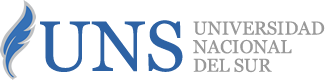

MODELOS FRACTALES Y SISTEMAS CAÓTICOS
---
PRACTICO No. 2.




---


**Renderizado de Diagramas de Fase**
---


```
Estudiante: Katherym Bambague Ruíz
```

En el renderizado de diagramas de fase nos despreocupamos de los aspectos formales y solamente nos concentramos en lo numérico.

*  “Sembramos” un conjunto representativo de semillas (uniforme o no).
-Para cada semilla evaluamos y graficamos su trayectora a diferencias finitas e, por el método de Euler o por Runge-Kutta, por vía directa o inversa (o un mix).
-El renderizado de las trayectorias puede ser un color plano o depender de varios factores (por ejemplo “cometas”)

# Importo las librerias

In [128]:
# Importo las librerias

import numpy as np
from matplotlib import pyplot as plt    #sublibrería pyplot
import matplotlib as mpl                #directamente con la librería matplotlib
import matplotlib.cm as cm              #Registro de mapa de colores


# Escribo las ecuaciones en funcion de 2 variables

In [129]:
def equation_1(u, t):
  x = 0
  y = 1
  return np.array([u[y], u[x]-u[x]*u[x]*u[x]])

def equation_2(u, t):
  x = 0
  y = 1
  return np.array([u[y], u[x]+u[x]*u[x]*u[x]])


def equation_3(u, t):

  x = 0
  y = 1
  return np.array( [u[x]*(1-u[y]), 0.5*u[y]*(u[x]-1)] )

def equation_4(u, t):
  x = 0
  y = 1
  return np.array( [u[x]*u[x]*u[y]*u[y]+1, 2*u[y]*u[x]+1] )

def equation_5(u, t):

  x = 0
  y = 1
  return np.array([u[y], u[x]*u[x]*(6-u[x])])


# Función para el método de Euler

In [130]:
def ode_euler_2D_forward(f, u0, dt, numero_iteraciones):

  #ARGUMENTOS DE LA FUNCIÓN:

  # f = ecuación para resolver
  # u0 = condición inicial
  # numero_iteraciones = Nro de iteraciones
  # dt = intervalo de tiempo 

  t = np.zeros(numero_iteraciones+1)
  num_equations = len(u0)

  if num_equations > 1 :
    u = np.zeros((numero_iteraciones + 1, num_equations))
  else:
    u = np.zeros(numero_iteraciones + 1)

  # Condicion inicial

  u[0] = u0
  t[0] = 0


  for k in range(numero_iteraciones):

    u[k+1] = f(u[k], t[k])*dt + u[k]
    t[k+1] = t[k] + dt

  return u,t

# Diagrama de fase

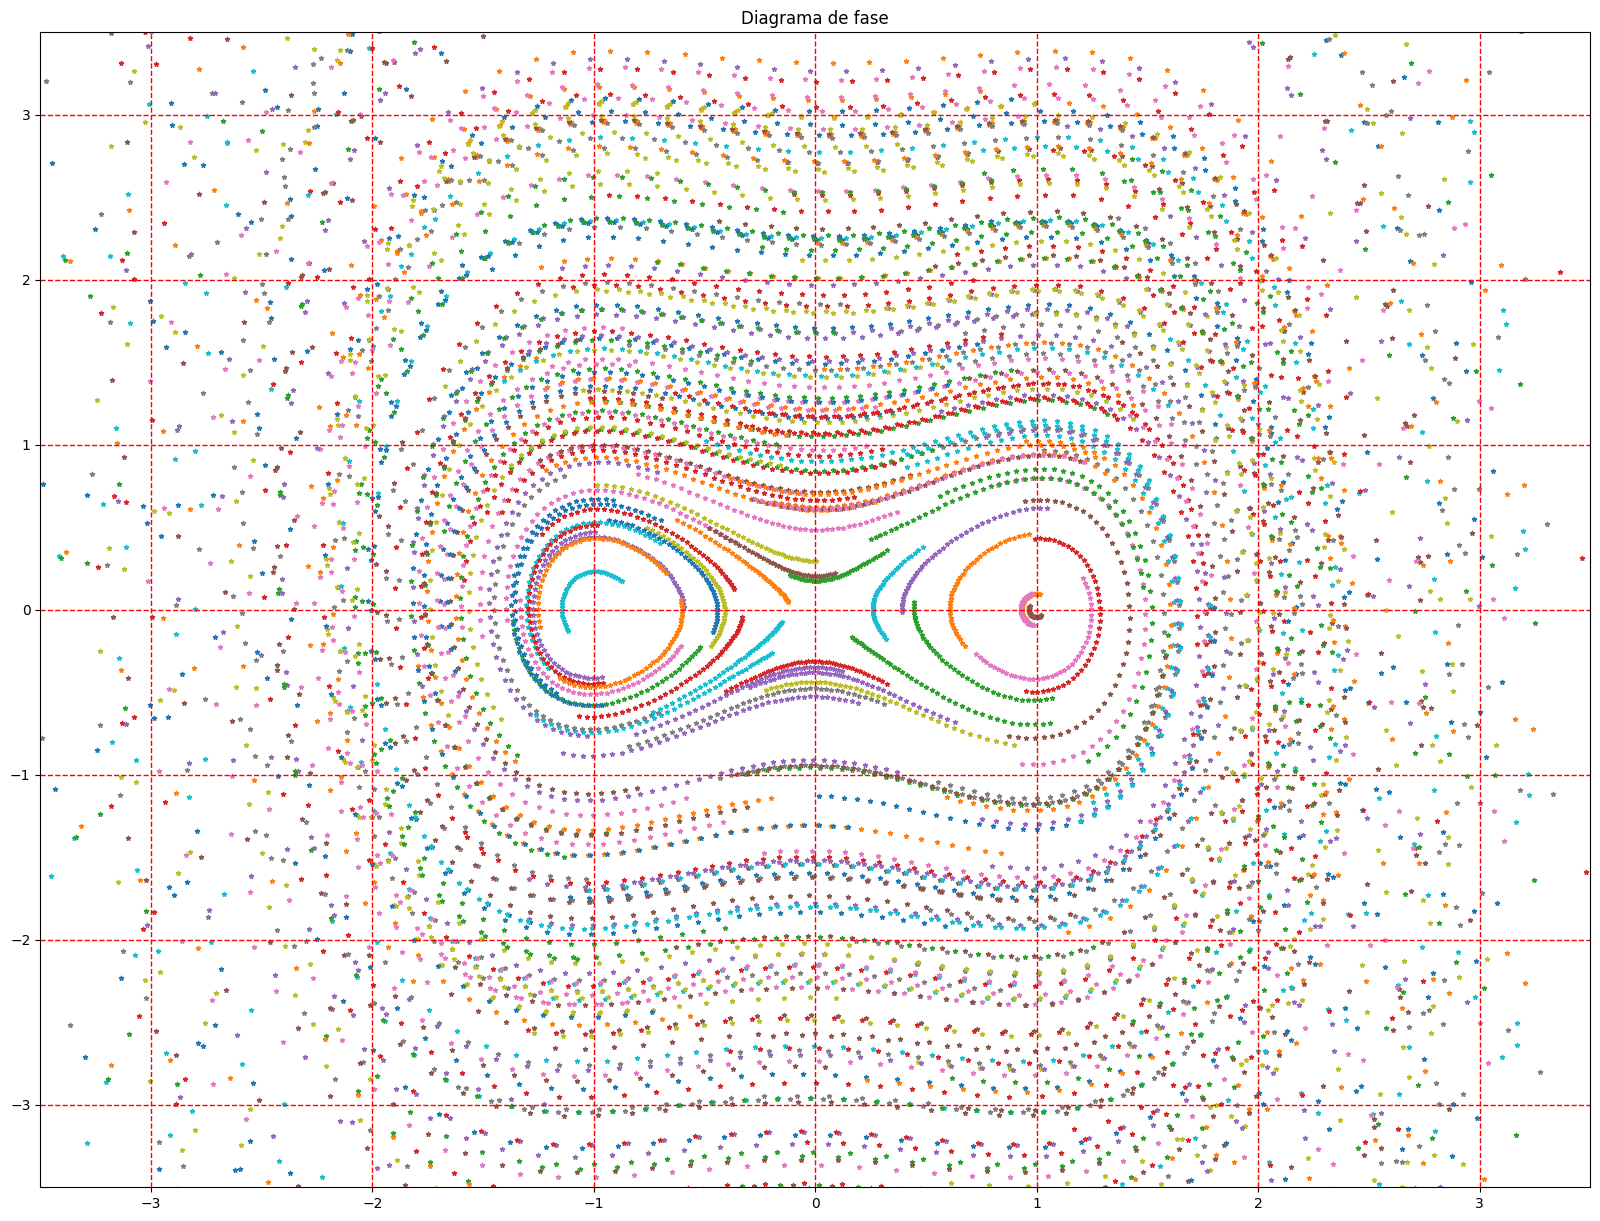

In [131]:
qty = 300
max_lim = 3
dt = 0.05
numero_iteraciones = 40

samples = np.random.uniform(low=[-max_lim, -max_lim], high=[max_lim, max_lim], size=(qty,2))
plt.figure(figsize=(20, 15))

for i, sample in enumerate(samples):

  U, t = ode_euler_2D_forward(equation_1, [sample[0], sample[1]], dt, numero_iteraciones) # de las ecuaciones que escribi, eligo la ecuacion que le aplicare el metodo de Euler
  mpl.style.use('default')
  plt.contourf = cm.hsv(np.linspace(0, 1, len(U)))
  plt.scatter(U[:,0],U[:,1], s=10, cmap='jet',  marker='*')

plt.title("Diagrama de fase")
plt.xlim((-3.5,3.5))
plt.ylim((-3.5,3.5))
plt.grid(color='red', linestyle='dashed', linewidth=1)
